In [1]:
import cv2
import tensorflow as tf
import numpy as np
import scipy.io
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.models import save_model

In [3]:
emnist_dir = '/Users/pushpakumar/Downloads/emnist'
emnist_data = scipy.io.loadmat('emnist-byclass.mat')

In [4]:
x_train = emnist_data['dataset']['train'][0, 0]['images'][0, 0]
y_train = emnist_data['dataset']['train'][0, 0]['labels'][0, 0]
x_test = emnist_data['dataset']['test'][0, 0]['images'][0, 0]
y_test = emnist_data['dataset']['test'][0, 0]['labels'][0, 0]

In [5]:
x_train_ini = x_train.reshape(-1,28 , 28, 1)
x_test_ini = x_test.reshape(-1, 28, 28, 1)

In [6]:
x_train = np.array([np.fliplr(np.rot90(img, k=3)) for img in x_train_ini])
x_test = np.array([np.fliplr(np.rot90(img, k=3)) for img in x_test_ini])

In [7]:
print(x_train.shape)

(697932, 28, 28, 1)


In [8]:
x_train=x_train/255.0
x_test=x_test/255.0

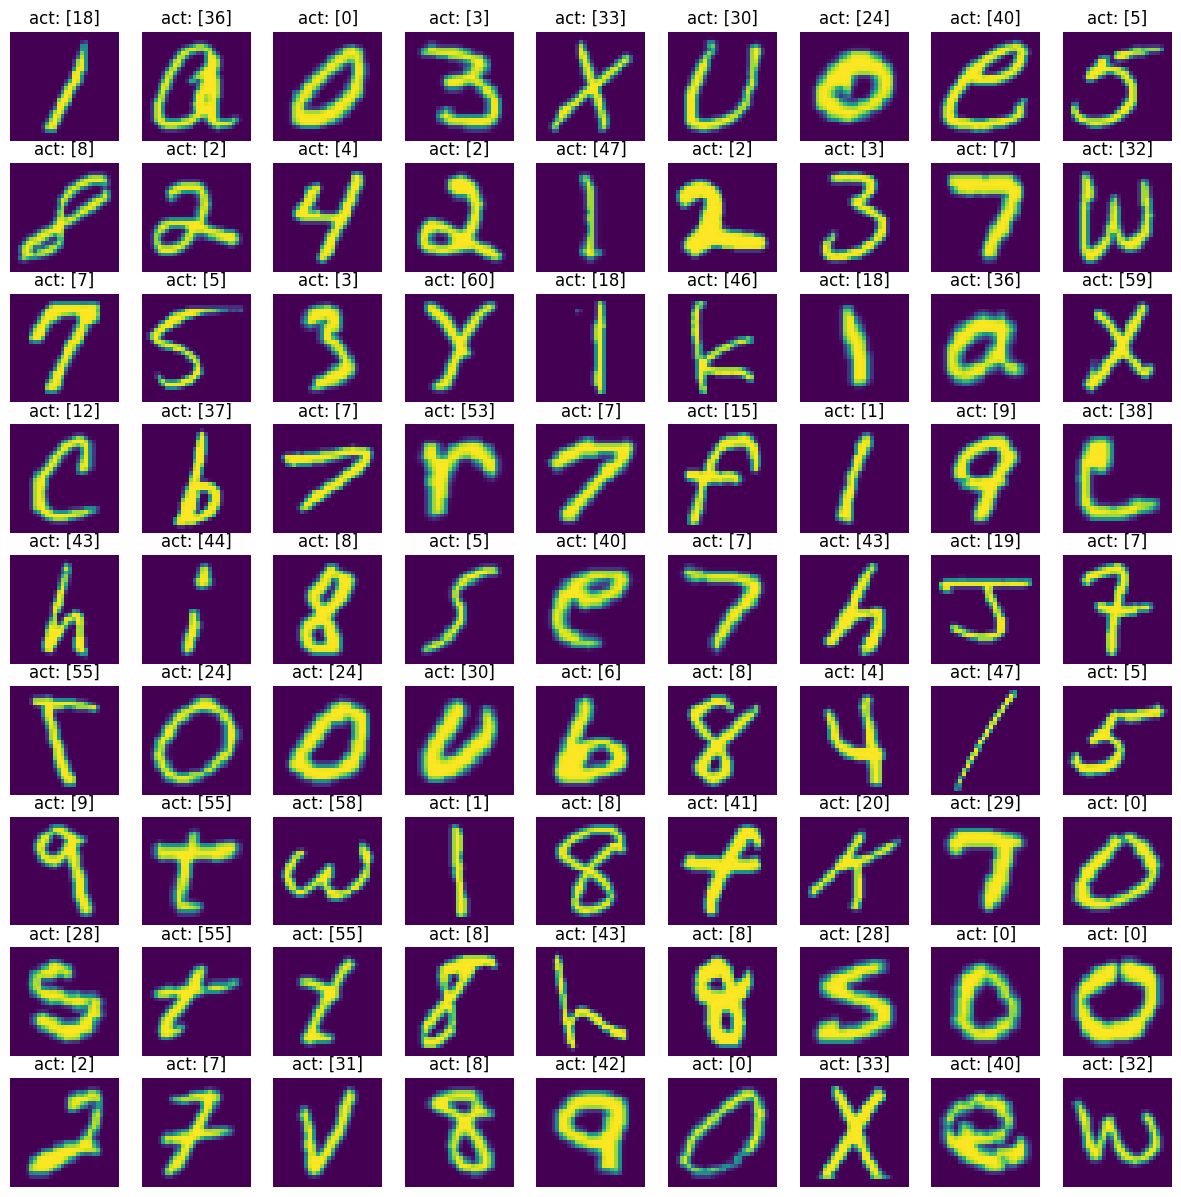

In [9]:
plt.figure(figsize=(15, 15))
for i in range(81):
    ax = plt.subplot(9, 9, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'act: {y_test[i]}')
    plt.axis("off")
    

In [10]:
no_classes=len(np.unique(y_train))
print(no_classes)

62


In [11]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(62, activation='softmax')
])

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 653,374 (2.49 MB)

 Trainable params: 650,942 (2.48 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
batch_size=256
epochs=10
history= model.fit(x_train, y_train,  batch_size,epochs,validation_data=(x_test,y_test))

Epoch 1/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 551s 201ms/step - accuracy: 0.6574 - loss: 1.2354 - val_accuracy: 0.8363 - val_loss: 0.4661
Epoch 2/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 607s 223ms/step - accuracy: 0.8111 - loss: 0.5560 - val_accuracy: 0.8435 - val_loss: 0.4375
Epoch 3/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 671s 246ms/step - accuracy: 0.8234 - loss: 0.5114 - val_accuracy: 0.8450 - val_loss: 0.4310
Epoch 4/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 782s 287ms/step - accuracy: 0.8305 - loss: 0.4880 - val_accuracy: 0.8525 - val_loss: 0.4075
Epoch 5/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 837s 307ms/step - accuracy: 0.8347 - loss: 0.4722 - val_accuracy: 0.8542 - val_loss: 0.4021
Epoch 6/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 592s 217ms/step - accuracy: 0.8381 - loss: 0.4608 - val_accuracy: 0.8560 - val_loss: 0.3953
Epoch 7/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 672s 246ms/step - accuracy: 0.8400 - loss: 0.4554 - val_accuracy: 0.8530 - val_loss: 0.4003
Epoch 8/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 617s 226ms/step - ac

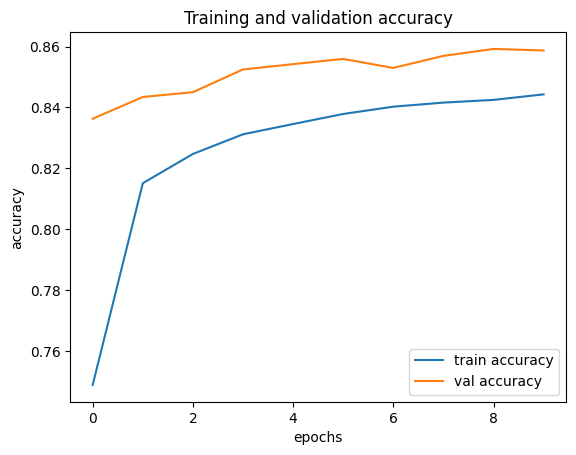

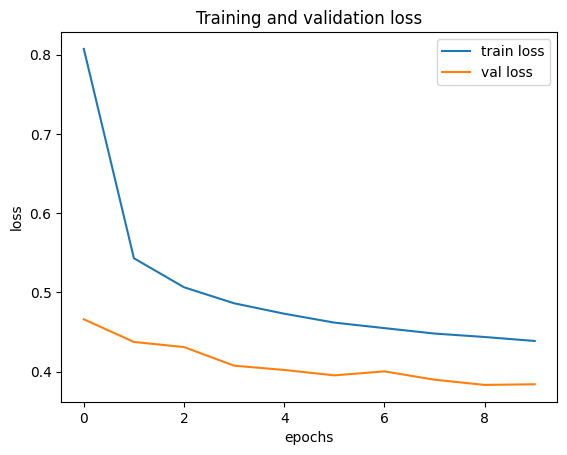

In [15]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs   = range(len(acc))

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')
plt.show()

In [16]:
(loss,accuracy)=model.evaluate(x_test,y_test,batch_size,verbose=1)
print(accuracy*100)

455/455 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8589 - loss: 0.3853
85.87209582328796


In [17]:
predict=model.predict(x_test)

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step


In [18]:
predicted_labels = np.argmax(predict, axis=1)

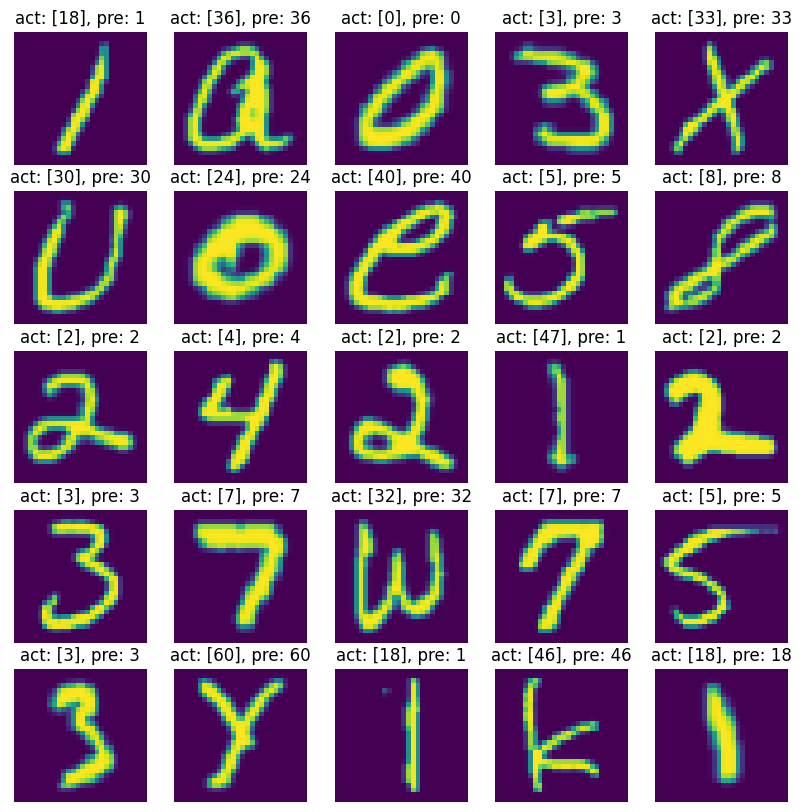

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'act: {y_test[i]}, pre: {predicted_labels[i]}')
    plt.axis("off")

In [20]:
filepath = 'model6_saved.h5'
save_model(model, filepath)